In [25]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, roc_auc_score

#import argparse
import os
import pandas as pd
import pickle
import time
import seaborn as sns

from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import StandardScaler

import lightgbm as lgb

from sklearn import model_selection

from utils import transform_datetime_features
from sdsj_feat import load_data
%matplotlib inline

In [26]:
#datasets = ['check_1_r', 'check_2_r', 'check_3_r', 'check_4_c', 'check_5_c', 'check_6_c', 'check_7_c', 'check_8_c']
dataset = 'check_2_r'
result_dir = './res'
data_dir = './data'

In [27]:
df = pd.read_csv('{}/{}/train.csv'.format(data_dir, dataset))
df_X, df_y, model_config, _ = load_data('{}/{}/train.csv'.format(data_dir, dataset))

Dataset read, shape (13958, 10)
Transform datetime done, shape (13958, 10)
Transform categorical done, shape (13958, 10)
Used 8 columns


In [28]:
df.head()

,string_0,string_1,number_0,number_1,number_2,number_3,number_4,number_5,target,is_test,line_id
0,Самара,Monday,173639.0,120.961599,NaN,9363.0,NaN,15,1.003,0,0
1,Самара,Thursday,239584.0,173.295883,NaN,13617.0,NaN,6,4.101,0,1
2,Москва,Monday,127507.0,111.757457,130038.0,7550.0,11514.0,7,0.373,0,3
3,Москва,Saturday,25494.0,15.318535,24960.0,2350.0,5068.0,1,3.750,0,4
4,Москва,Tuesday,10562.0,7.108631,9562.0,1107.0,2037.0,10,0.807,0,6


In [29]:
df.describe()

,number_0,number_1,number_2,number_3,number_4,number_5,target,is_test,line_id
count,1.375900e+04,13958.000000,1.002800e+04,13759.000000,10028.000000,13958.000000,13958.000000,13958.0,13958.000000
mean,4.699422e+05,377.618126,4.028625e+05,23124.075151,32773.118169,6.234919,2.713485,0.0,9959.730764
std,7.144992e+05,532.443690,6.721022e+05,33451.212991,50953.531324,2.829829,2.344721,0.0,5740.080848
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.009000,0.0,0.000000
25%,2.849100e+04,18.943256,1.729400e+04,2531.000000,3903.000000,5.000000,1.009000,0.0,5007.250000
50%,2.738700e+05,236.020561,1.978200e+05,13792.000000,15492.000000,5.000000,2.002000,0.0,9950.500000
75%,5.647030e+05,474.502791,4.934702e+05,27273.000000,37483.000000,7.000000,3.432750,0.0,14894.750000
max,1.050700e+07,7870.182502,8.592943e+06,479683.000000,544460.000000,36.000000,20.927000,0.0,19933.000000


# number_0

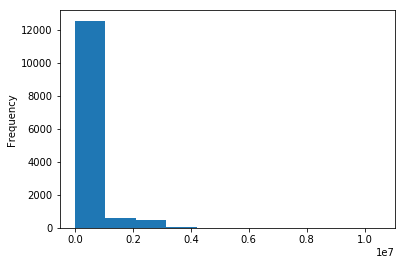

In [30]:
#df.number_0.value_counts()#.plot()
df.number_0.plot.hist()

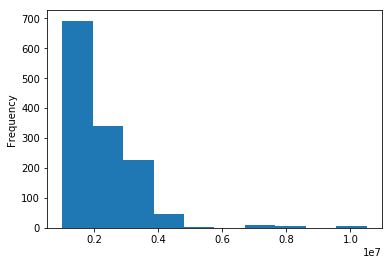

In [31]:
df[df.number_0 > 1000000].number_0.plot.hist()

In [32]:
df.sort_values(by='number_0').tail()

,string_0,string_1,number_0,number_1,number_2,number_3,number_4,number_5,target,is_test,line_id
13861,Хабаровск,Friday,NaN,1871.777597,NaN,NaN,NaN,3,17.698,0,19797
13876,Хабаровск,Tuesday,NaN,1725.601215,NaN,NaN,NaN,9,5.759,0,19820
13885,Новосибирск,Friday,NaN,1224.106757,NaN,NaN,NaN,4,7.783,0,19831
13887,Хабаровск,Friday,NaN,3073.735824,NaN,NaN,NaN,6,11.325,0,19834
13891,Нижний Новгород,Tuesday,NaN,1615.196257,NaN,NaN,NaN,5,6.395,0,19839


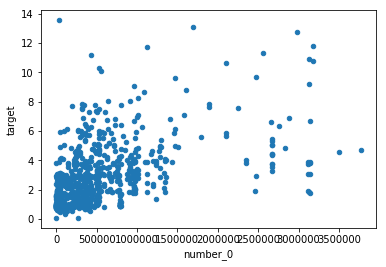

In [33]:
df.sample(1000).plot.scatter(y='target', x='number_0')

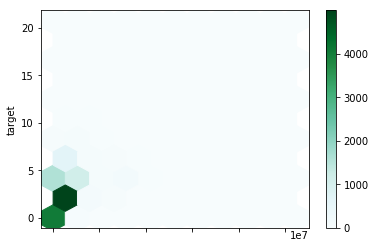

In [34]:
df.plot.hexbin(x='number_0', y='target', gridsize = 10)

# string_0

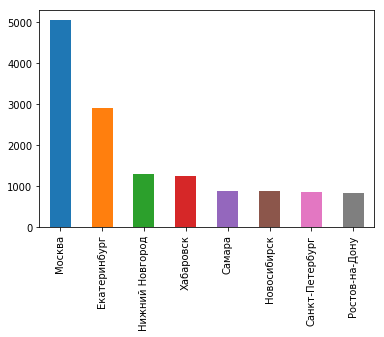

In [35]:
df.string_0.value_counts().head(10).plot.bar()

# string_1

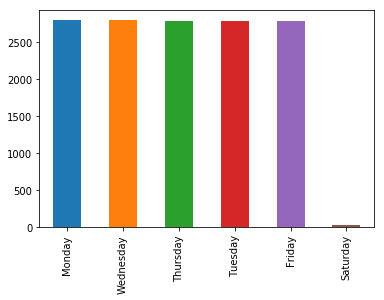

In [36]:
df.string_1.value_counts().head(10).plot.bar()

# number_1

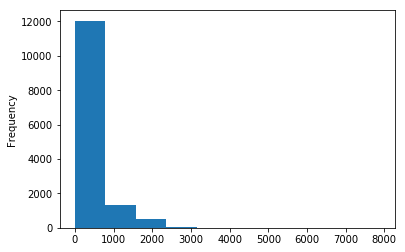

In [37]:
df.number_1.plot.hist()

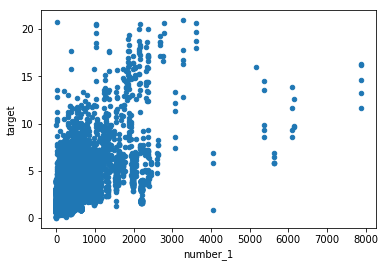

In [38]:
df.plot.scatter(y='target', x='number_1')

# number_2

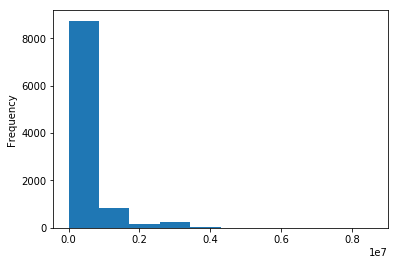

In [39]:
df.number_2.plot.hist()

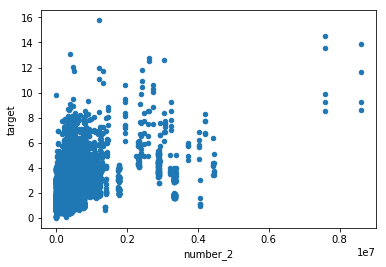

In [40]:
df.plot.scatter(y='target', x='number_2')

# number_5

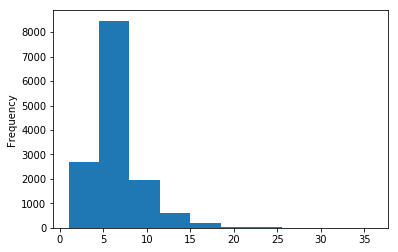

In [41]:
df.number_5.plot.hist()

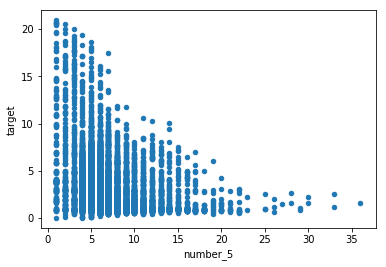

In [42]:
df.plot.scatter(y='target', x='number_5')

In [43]:
df.number_5.value_counts().head(20)

5     4803
6     2490
4     2079
7     1175
8      763
9      479
10     387
11     320
3      289
12     278
13     200
2      169
1      138
14     107
15      85
16      63
17      35
18      28
20      17
19      13
Name: number_5, dtype: int64

# target

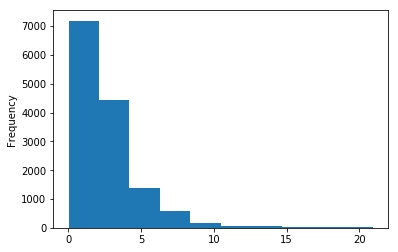

In [44]:
df.target.plot.hist()

In [45]:
df.target.value_counts().size

5044

In [46]:
df.describe()

,number_0,number_1,number_2,number_3,number_4,number_5,target,is_test,line_id
count,1.375900e+04,13958.000000,1.002800e+04,13759.000000,10028.000000,13958.000000,13958.000000,13958.0,13958.000000
mean,4.699422e+05,377.618126,4.028625e+05,23124.075151,32773.118169,6.234919,2.713485,0.0,9959.730764
std,7.144992e+05,532.443690,6.721022e+05,33451.212991,50953.531324,2.829829,2.344721,0.0,5740.080848
min,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,1.000000,0.009000,0.0,0.000000
25%,2.849100e+04,18.943256,1.729400e+04,2531.000000,3903.000000,5.000000,1.009000,0.0,5007.250000
50%,2.738700e+05,236.020561,1.978200e+05,13792.000000,15492.000000,5.000000,2.002000,0.0,9950.500000
75%,5.647030e+05,474.502791,4.934702e+05,27273.000000,37483.000000,7.000000,3.432750,0.0,14894.750000
max,1.050700e+07,7870.182502,8.592943e+06,479683.000000,544460.000000,36.000000,20.927000,0.0,19933.000000


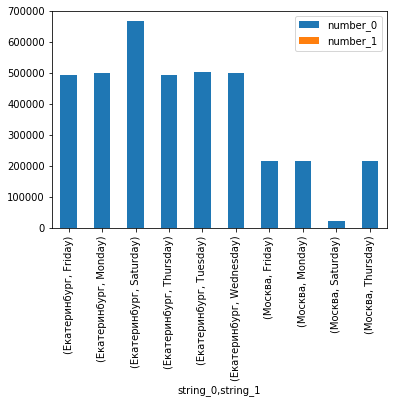

In [47]:
#просто построим stack
(df.groupby(['string_0', 'string_1'])
     .mean()[['number_0', 'number_1']]
     .head(10)
     .plot.bar(stacked=True)
)

# разное

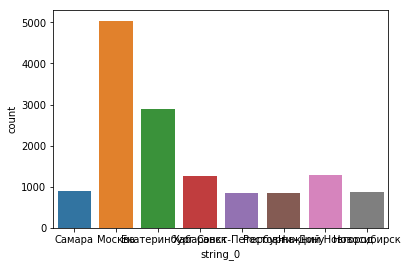

In [50]:
sns.countplot(df['string_0'])

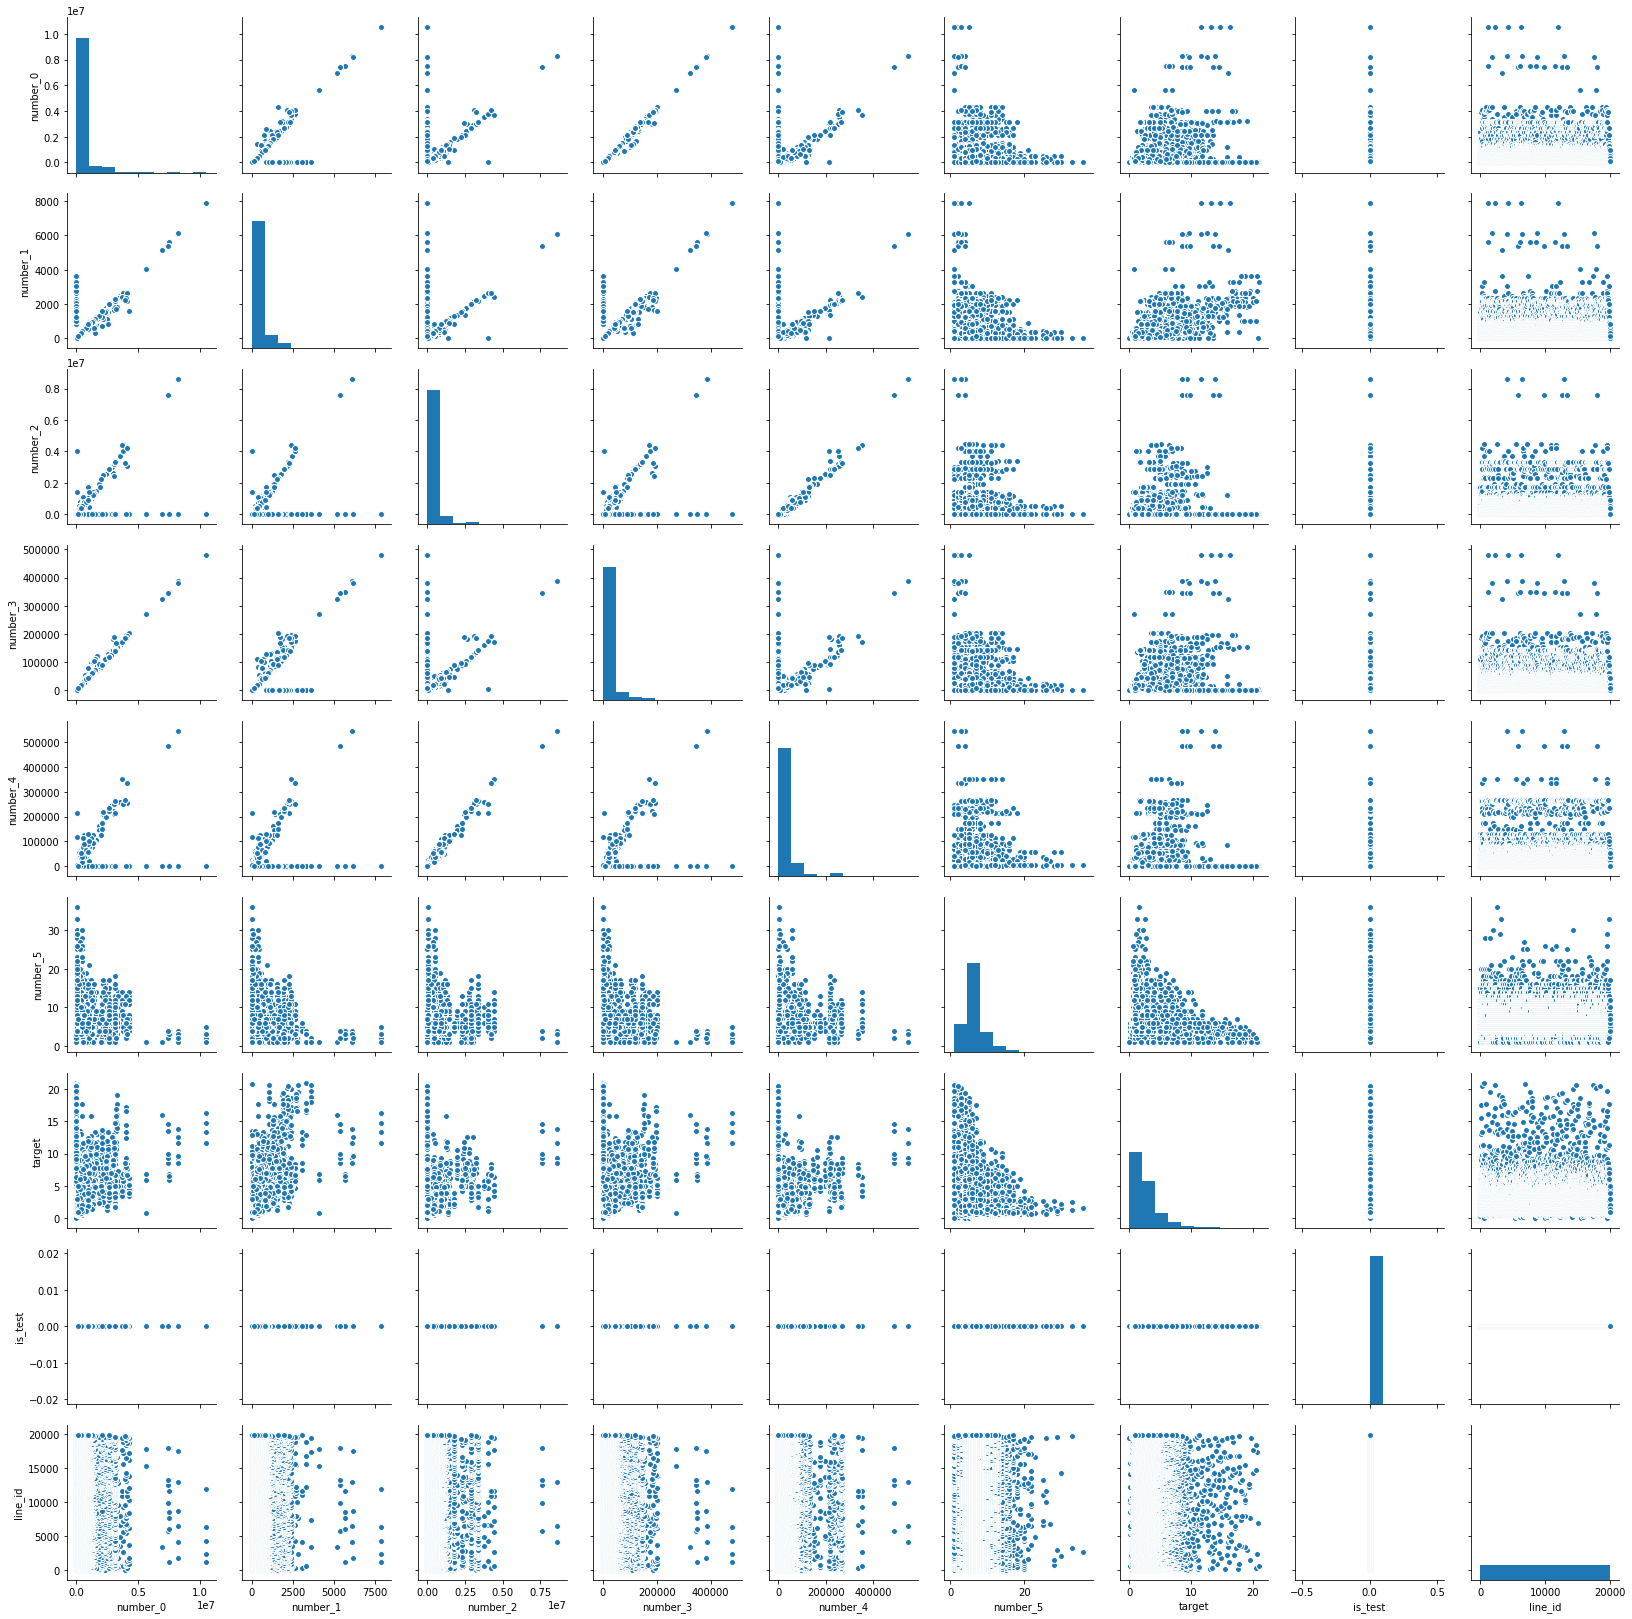

In [74]:
sns.pairplot(df.fillna(0))

In [75]:
df_ = df.fillna(0)


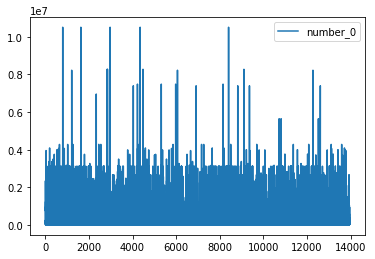

In [94]:
#df_[['number_0']].plot.hist()
#df_[["number_1"]].plot.hist()
df_[['number_0']].plot.line()


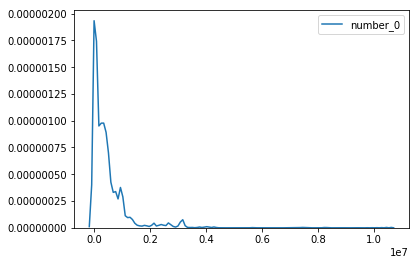

In [93]:
sns.kdeplot(df_.number_0)

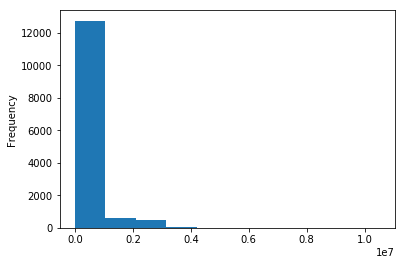

In [96]:
df_.number_0.plot.hist()

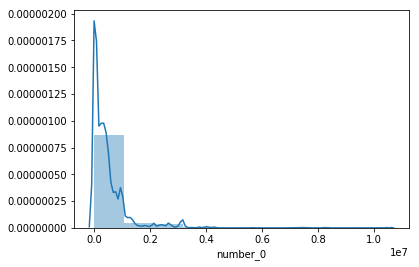

In [99]:
sns.distplot(df_.number_0, bins=10, kde=True)

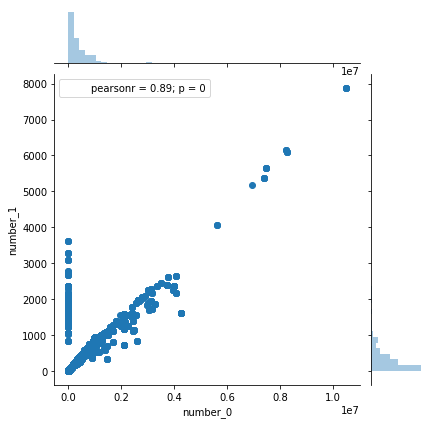

In [100]:
sns.jointplot(x='number_0', y='number_1', data=df_)

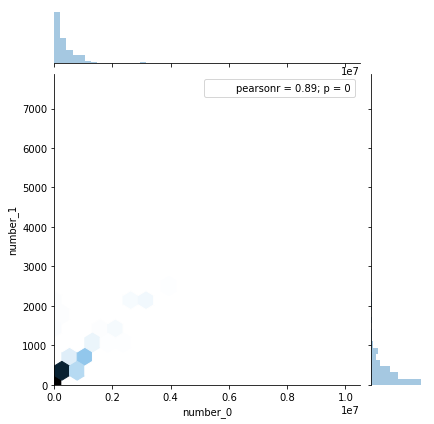

In [106]:
sns.jointplot(x='number_0', y='number_1', data=df_, kind='hex', gridsize=20)

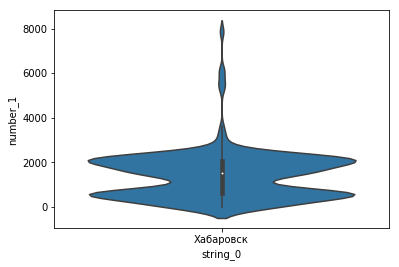

In [140]:
sns.violinplot(x='string_0', y='number_1', data=df_.query('string_0 == \'Хабаровск\''))
#df.string_0.value_counts().head(10).plot.bar()

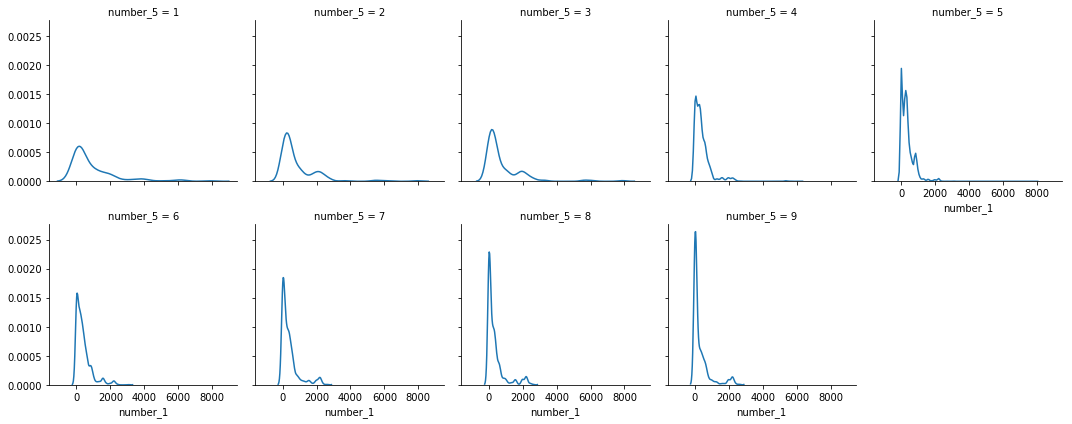

In [158]:
#df = footballers[footballers['Position'].isin(['ST', 'GK'])]
#g = sns.FacetGrid(df, col="Position")
#g.map(sns.kdeplot, "Overall")

df.number_5.unique()
g = sns.FacetGrid(df_.query('number_5 < 10'), col="number_5", col_wrap=5)
g.map(sns.kdeplot, "number_1")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the violinplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


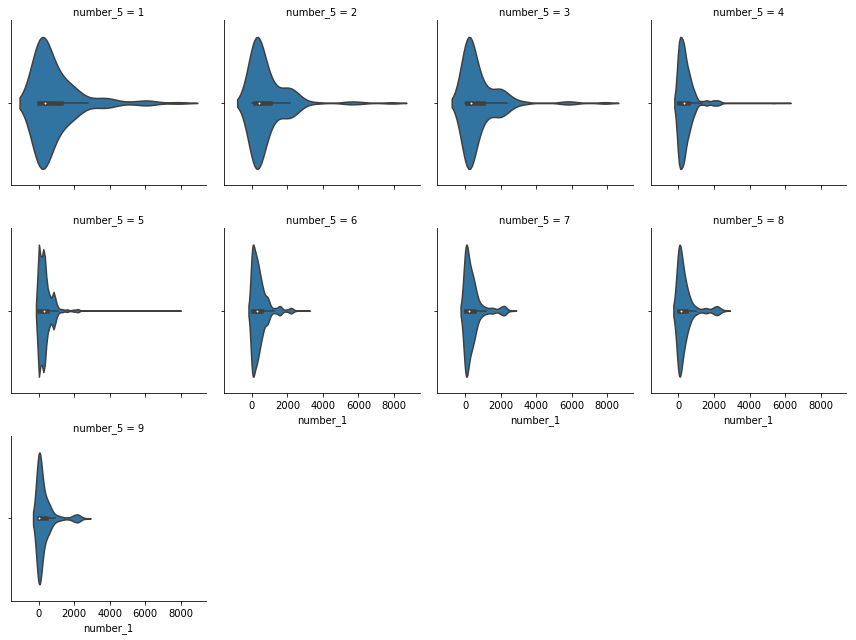

In [161]:
g = sns.FacetGrid(df_.query('number_5 < 10'),  col="number_5", col_wrap=4)
g.map(sns.violinplot, "number_1")

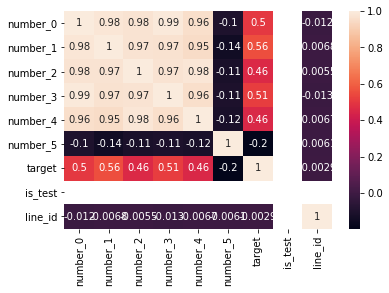

In [164]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
#необходимо удалять или восстанавливать пропущенные